<a href="https://colab.research.google.com/github/lakshmirnair/student_attendance_app/blob/master/ML_algorithm/Regression/PolyReg_Curvilineardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

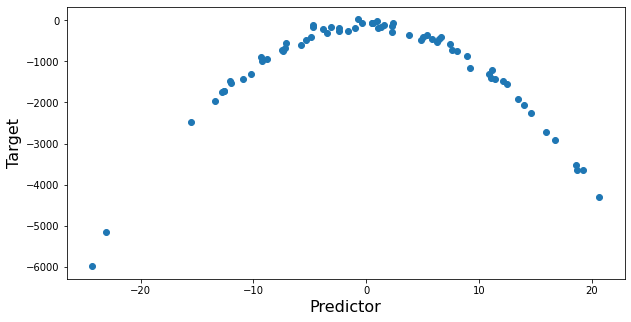

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
#mu=0,sigma=1
x=10*np.random.normal(0,1,70)
y=10*(-x**2)+np.random.normal(-100,100,70)

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

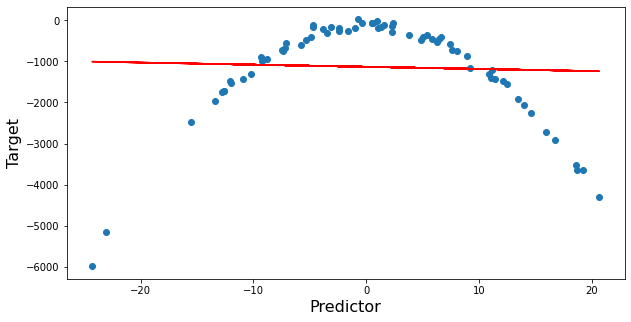

In [9]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
#reshaping ito n datapoints rows and 1 column
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

y_pred=lm.predict(x.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [10]:
print('RMSE for Linear Regression :',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression : 1244.8478996970116


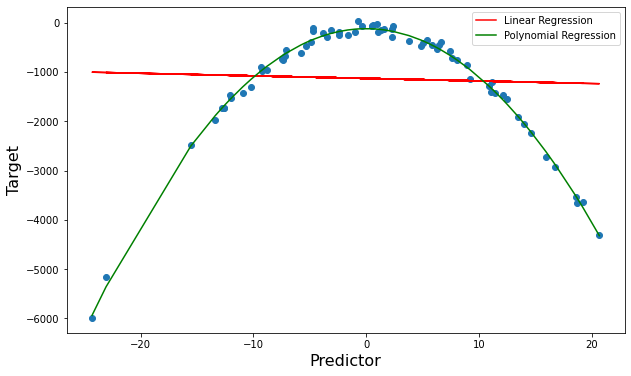

In [11]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)

plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [12]:
print('RMSE for Polynomial Regression :',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression : 1606.6018403619419
